In [1]:
#importing libraries
import numpy as np
import pandas as pd
import io
import os
from google.colab import files

In [2]:
file = files.upload()
df1 = pd.read_csv('user_nodes.csv')

Saving user_nodes.csv to user_nodes.csv


In [3]:
df1

,id_,area_id_,node_id_,act_date,deact_date,has_loan,is_act
0,1,3,4,02-01-2020,03-01-2020,1,0
1,2,3,5,03-01-2020,17-01-2020,0,1
2,3,5,4,27-01-2020,18-02-2020,0,0
3,4,5,4,07-01-2020,19-01-2020,1,1
4,5,3,3,15-01-2020,23-01-2020,0,1
...,...,...,...,...,...,...,...
3638,261,2,4,25-01-2020,07-02-2020,1,0
3639,262,3,3,04-01-2020,13-01-2020,0,0
3640,263,2,3,16-01-2020,16-01-2020,0,1
3641,264,4,1,16-01-2020,31-01-2020,0,0


In [4]:
#Checking null values
def check_null_values(df1):
  null_values = df1.isnull().sum()

  if null_values.any():
    print ("Null values ")
  else:
    print ("No null values")

#returning the results containg null value
  return null_values

#Function to get the count of null values

null_Values_count = check_null_values(df1)

No null values


In [5]:
#checking for duplicates

def check_duplicates(df1):
#check for duplicates

  duplicates = df1.duplicated()

#count the number of duplicates

  duplicates_count = duplicates.sum()

#printing if there are any duplicates in the data

  if duplicates_count > 0:
    print("There are duplicates")
  else:
    print ("No duplicates")

  return duplicates_count

duplicates_count = check_duplicates(df1)
print("Total duploicates:", duplicates_count)

There are duplicates
Total duploicates: 143


In [6]:
#dropping the duplicate values

def drop_duplicates(df1):

  duplicates = df1.drop_duplicates()
  return duplicates

#calling the function

df2 = drop_duplicates(df1)
print('Duplicates', df2)

Duplicates       id_  area_id_  node_id_    act_date  deact_date  has_loan  is_act
0       1         3         4  02-01-2020  03-01-2020         1       0
1       2         3         5  03-01-2020  17-01-2020         0       1
2       3         5         4  27-01-2020  18-02-2020         0       0
3       4         5         4  07-01-2020  19-01-2020         1       1
4       5         3         3  15-01-2020  23-01-2020         0       1
...   ...       ...       ...         ...         ...       ...     ...
3495  496         3         4  25-02-2020  31-12-2021         0       0
3496  497         5         4  27-05-2020  31-12-2021         0       1
3497  498         1         2  05-04-2020  31-12-2021         0       0
3498  499         5         1  03-02-2020  31-12-2021         1       1
3499  500         2         2  15-04-2020  31-12-2021         0       1

[3500 rows x 7 columns]


In [7]:
#remvoing unwanted columns from the dataset

def drop_columns(df2):
  dropcolumns = df2.drop(columns=['has_loan', 'is_act'] )

  return dropcolumns

#Calling the function

df1_droppedcolumns = drop_columns(df1)

print('New Dataframe', df1_droppedcolumns)

df1_droppedcolumns.head()

df3 = df1_droppedcolumns

New Dataframe       id_  area_id_  node_id_    act_date  deact_date
0       1         3         4  02-01-2020  03-01-2020
1       2         3         5  03-01-2020  17-01-2020
2       3         5         4  27-01-2020  18-02-2020
3       4         5         4  07-01-2020  19-01-2020
4       5         3         3  15-01-2020  23-01-2020
...   ...       ...       ...         ...         ...
3638  261         2         4  25-01-2020  07-02-2020
3639  262         3         3  04-01-2020  13-01-2020
3640  263         2         3  16-01-2020  16-01-2020
3641  264         4         1  16-01-2020  31-01-2020
3642  265         1         2  08-01-2020  28-01-2020

[3643 rows x 5 columns]


In [8]:
def rename_columns(df3):
  rename_df = df1.rename(columns={"id_":"consumer_id", "area_id_": "region_id", "node_id_" : "node_id", "act_date" : "start_date", "deact_date" : "end_date"})

  return rename_df
#Calling the function
df1_rename = rename_columns(df3)
print("Renamed coluumns", df1_rename)



Renamed coluumns       consumer_id  region_id  node_id  start_date    end_date  has_loan  \
0               1          3        4  02-01-2020  03-01-2020         1   
1               2          3        5  03-01-2020  17-01-2020         0   
2               3          5        4  27-01-2020  18-02-2020         0   
3               4          5        4  07-01-2020  19-01-2020         1   
4               5          3        3  15-01-2020  23-01-2020         0   
...           ...        ...      ...         ...         ...       ...   
3638          261          2        4  25-01-2020  07-02-2020         1   
3639          262          3        3  04-01-2020  13-01-2020         0   
3640          263          2        3  16-01-2020  16-01-2020         0   
3641          264          4        1  16-01-2020  31-01-2020         0   
3642          265          1        2  08-01-2020  28-01-2020         1   

      is_act  
0          0  
1          1  
2          0  
3          1  
4      

In [9]:
df1_rename.head()

,consumer_id,region_id,node_id,start_date,end_date,has_loan,is_act
0,1,3,4,02-01-2020,03-01-2020,1,0
1,2,3,5,03-01-2020,17-01-2020,0,1
2,3,5,4,27-01-2020,18-02-2020,0,0
3,4,5,4,07-01-2020,19-01-2020,1,1
4,5,3,3,15-01-2020,23-01-2020,0,1


In [10]:
#importing clean file
from google.colab import files
df1_rename.to_csv('user_nodes_clean.csv')
files.download('user_nodes_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
#Checking Null Values fro user_transaction

file = files.upload()
df4 = pd.read_csv('user_transactions.csv')

Saving user_transactions.csv to user_transactions.csv


In [12]:
df4.head()

,id_,t_date,t_type,t_amt,has_credit_card,account_type
0,312,20-01-2020,deposit,485,Yes,Savings
1,376,03-01-2020,deposit,706,No,Current
2,188,13-01-2020,deposit,601,No,Savings
3,138,11-01-2020,deposit,520,No,Salary
4,373,18-01-2020,deposit,596,No,Salary


In [13]:
#Checking null values
def check_null_values(df4):
  null_values = df1.isnull().sum()

  if null_values.any():
    print ("Null values ")
  else:
    print ("No null values")

#returning the results containg null value
  return null_values

#Function to get the count of null values

null_Values_count = check_null_values(df4)

No null values


In [14]:
#checking for duplicates

def check_duplicates(df4):
#check for duplicates

  duplicates = df4.duplicated()

#count the number of duplicates

  duplicates_count = duplicates.sum()

#printing if there are any duplicates in the data

  if duplicates_count > 0:
    print("There are duplicates")
  else:
    print ("No duplicates")

  return duplicates_count

duplicates_count = check_duplicates(df4)
print("Total duploicates:", duplicates_count)

There are duplicates
Total duploicates: 79


In [15]:
df4.shape

(5947, 6)

In [16]:
#dropping the duplicate values

def drop_duplicates(df4):

  duplicates = df4.drop_duplicates()
  return duplicates

#calling the function

df2 = drop_duplicates(df4)
print('Duplicates', df2)

Duplicates       id_      t_date   t_type  t_amt has_credit_card account_type
0     312  20-01-2020  deposit    485             Yes      Savings
1     376  03-01-2020  deposit    706              No      Current
2     188  13-01-2020  deposit    601              No      Savings
3     138  11-01-2020  deposit    520              No       Salary
4     373  18-01-2020  deposit    596              No       Salary
...   ...         ...      ...    ...             ...          ...
5863  155  10-01-2020  deposit    712             Yes      Savings
5864  398  01-01-2020  deposit    196              No      Current
5865  255  14-01-2020  deposit    563             Yes      Savings
5866  185  29-01-2020  deposit    626             Yes      Savings
5867  309  13-01-2020  deposit    995             Yes      Savings

[5868 rows x 6 columns]


In [17]:
df2.shape

(5868, 6)

In [18]:
#importing clean file
from google.colab import files
df2.to_csv('user_transaction_clean1.csv')
files.download('user_transaction_clean1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
file = files.upload()
df1 = pd.read_csv('world_regions.csv')

Saving world_regions.csv to world_regions.csv


In [20]:
df1.head()

,region_id,region_name
0,1,United States
1,2,Europe
2,3,Australia
3,4,Asia
4,5,Africa


In [21]:
df1.shape

(7, 2)

Saving user_nodes.csv to user_nodes (1).csv


<ipython-input-23-a417dcb79851>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


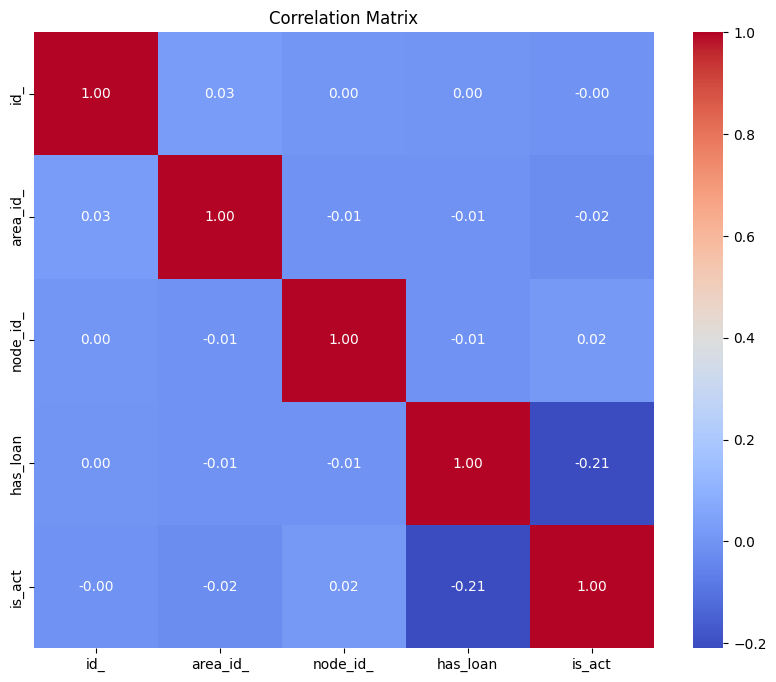

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = files.upload()
df1 = pd.read_csv('user_nodes.csv')

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Saving user_transaction_clean.csv to user_transaction_clean.csv


<ipython-input-25-dc400718feb1>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


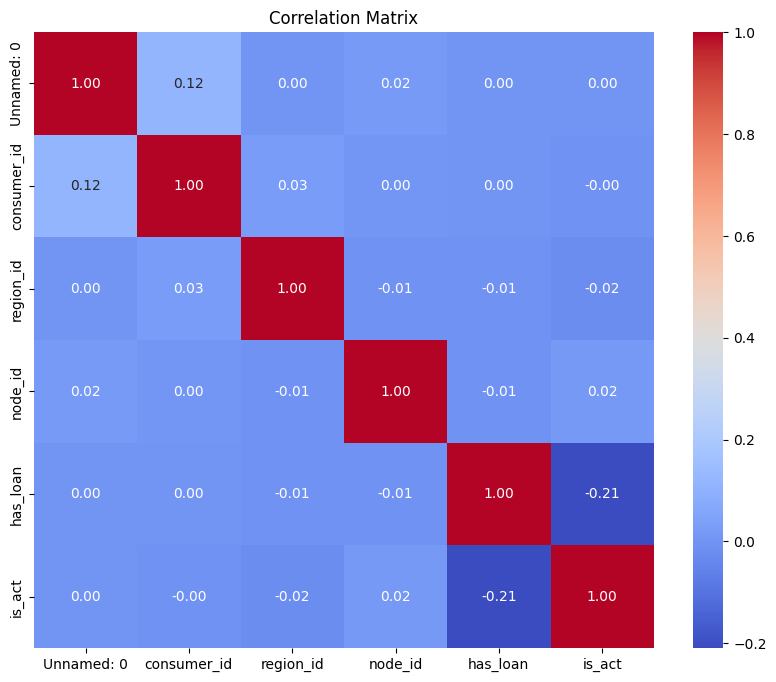

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = files.upload()
df1 = pd.read_csv('user_transaction_clean.csv')

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [29]:
from sqlalchemy import Transaction
# Example code for merging datasets using Pandas
merged_data = .merge(Transaction, on='id_', how='inner')


NameError: ignored

In [30]:
df1.head()

,Unnamed: 0,consumer_id,region_id,node_id,start_date,end_date,has_loan,is_act
0,0,1,3,4,02-01-2020,03-01-2020,1,0
1,1,2,3,5,03-01-2020,17-01-2020,0,1
2,2,3,5,4,27-01-2020,18-02-2020,0,0
3,3,4,5,4,07-01-2020,19-01-2020,1,1
4,4,5,3,3,15-01-2020,23-01-2020,0,1


In [31]:
df2.head()

,id_,t_date,t_type,t_amt,has_credit_card,account_type
0,312,20-01-2020,deposit,485,Yes,Savings
1,376,03-01-2020,deposit,706,No,Current
2,188,13-01-2020,deposit,601,No,Savings
3,138,11-01-2020,deposit,520,No,Salary
4,373,18-01-2020,deposit,596,No,Salary


In [32]:
df3.head()

,id_,area_id_,node_id_,act_date,deact_date
0,1,3,4,02-01-2020,03-01-2020
1,2,3,5,03-01-2020,17-01-2020
2,3,5,4,27-01-2020,18-02-2020
3,4,5,4,07-01-2020,19-01-2020
4,5,3,3,15-01-2020,23-01-2020


In [38]:
df1.consumer_id.dtype

dtype('int64')

In [40]:
df2.id_.dtype

dtype('int64')

In [51]:
file = files.upload()
df1 = pd.read_csv('user_transaction_clean1.csv')
df1.rename(columns={'id_': 'consumer_id'}, inplace=True)

Saving user_transaction_clean1.csv to user_transaction_clean1 (6).csv


In [52]:
df1.head()

,Unnamed: 0,consumer_id,t_date,t_type,t_amt,has_credit_card,account_type
0,0,312,20-01-2020,deposit,485,Yes,Savings
1,1,376,03-01-2020,deposit,706,No,Current
2,2,188,13-01-2020,deposit,601,No,Savings
3,3,138,11-01-2020,deposit,520,No,Salary
4,4,373,18-01-2020,deposit,596,No,Salary


In [53]:
#importing clean file
from google.colab import files
df1.to_csv('user_transactions.csv')
files.download('user_transactions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>